# Regression

## What is Regression

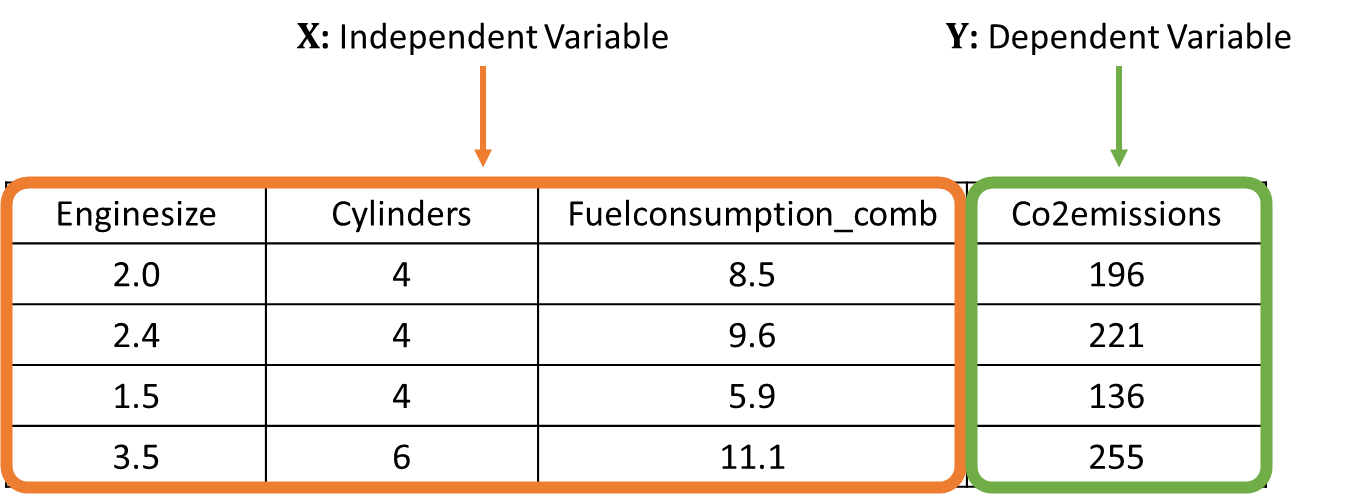

### Regression Algorithms
* Ordinal regression
* Poisson regression
* Fast forest quantile regression
* Linear, Polynomial, Lasso, Stepwise, Ridge regression
* Bayesian linear regression
* Neural network regression
* Decision forest regression
* Boosted decision tree regression
* KNN (K-nearest neighbors)

## Calculation of $θ_0$ and $θ_1$ in Linear Regression

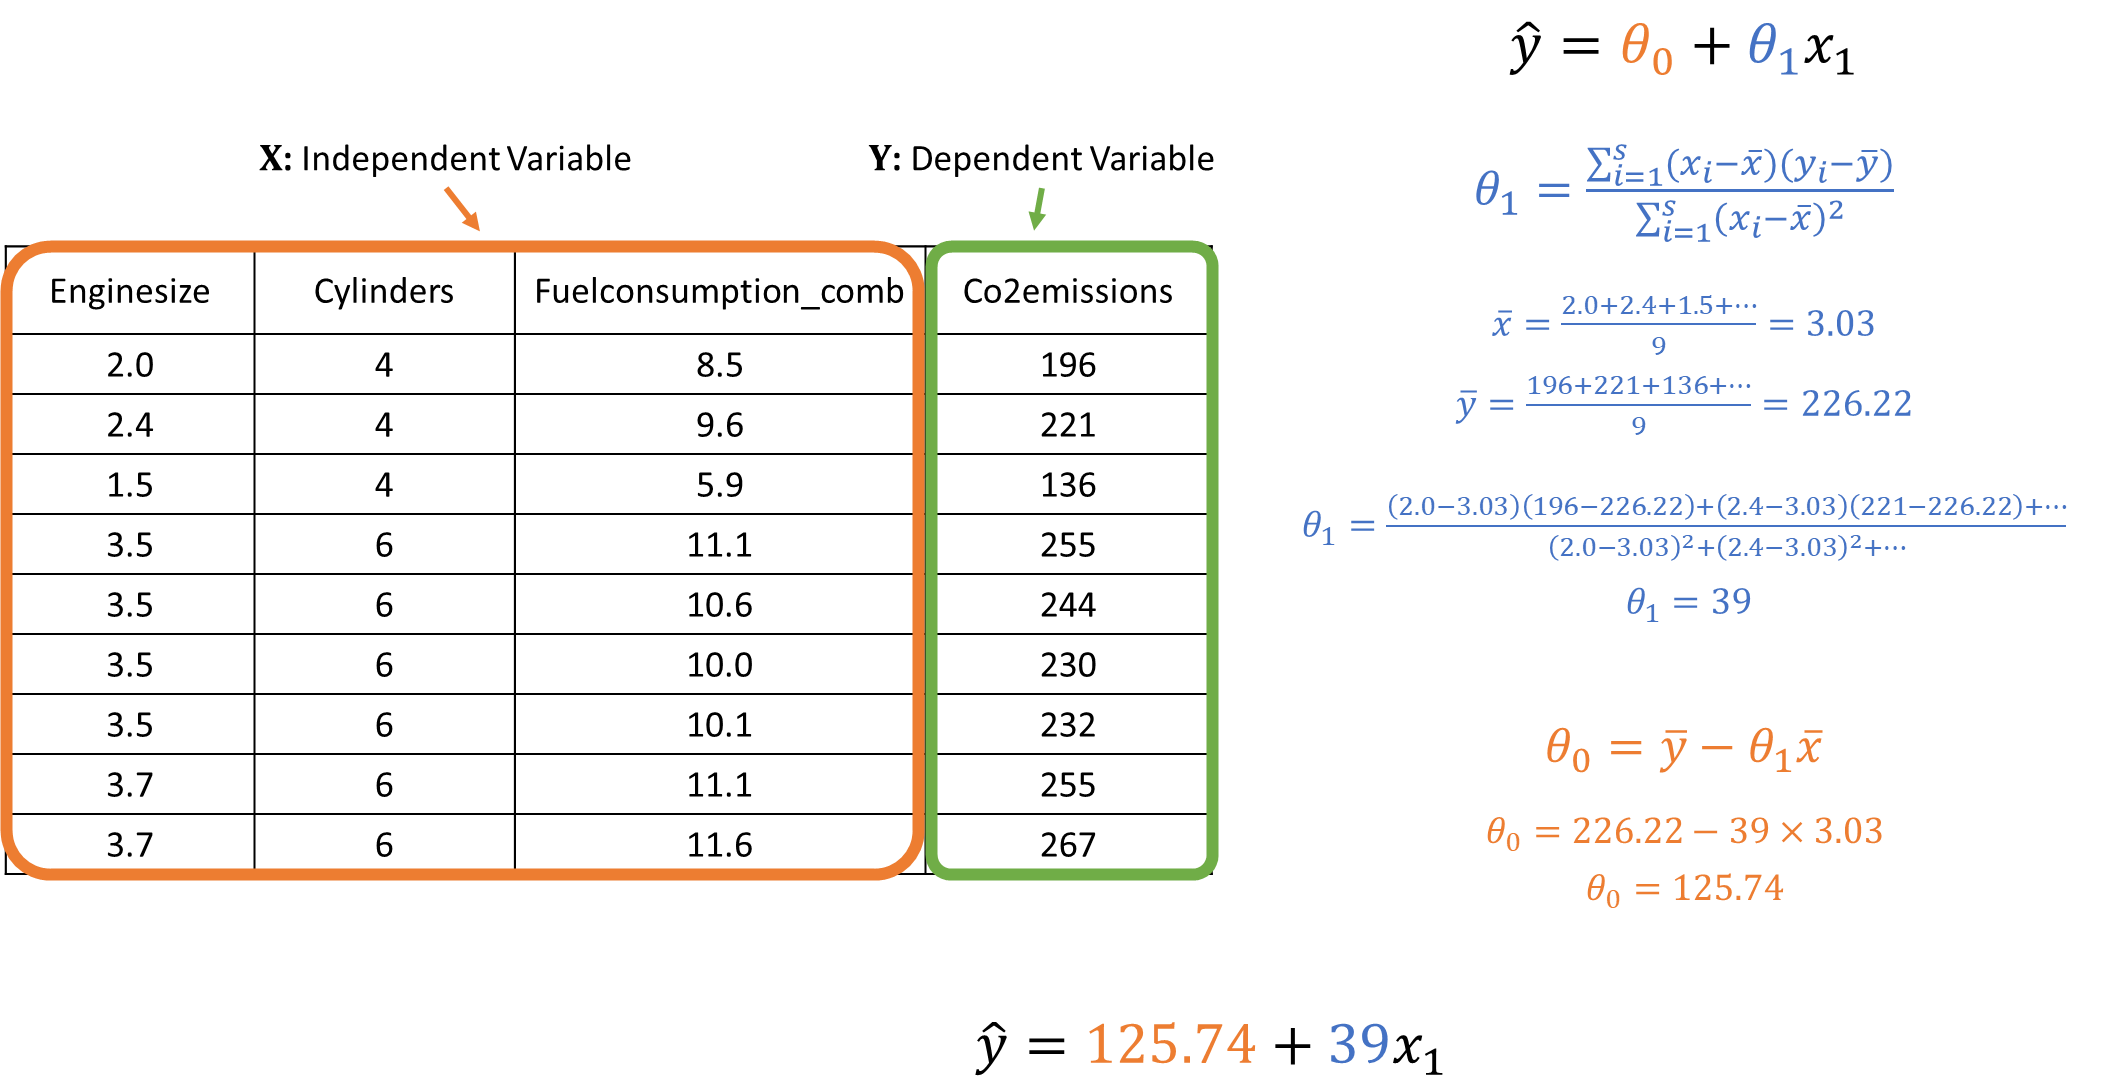

## Linear Regression Prediction

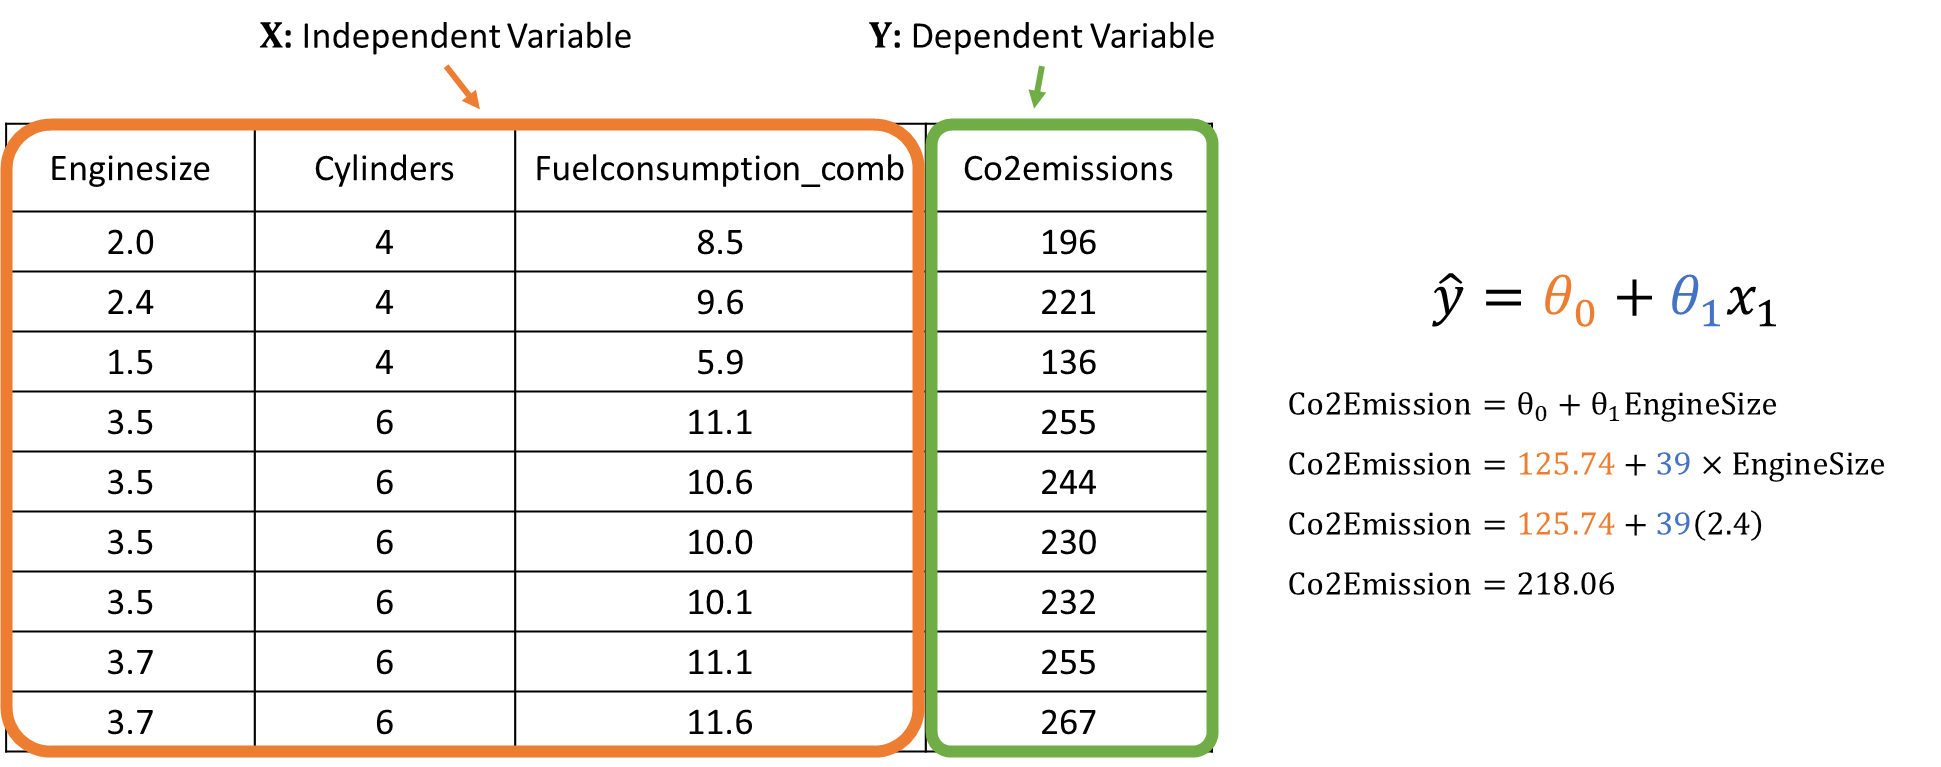

## Evaluation Metrics in Regression Models

**Error:** measure of how far the data is from the fitted regression line.

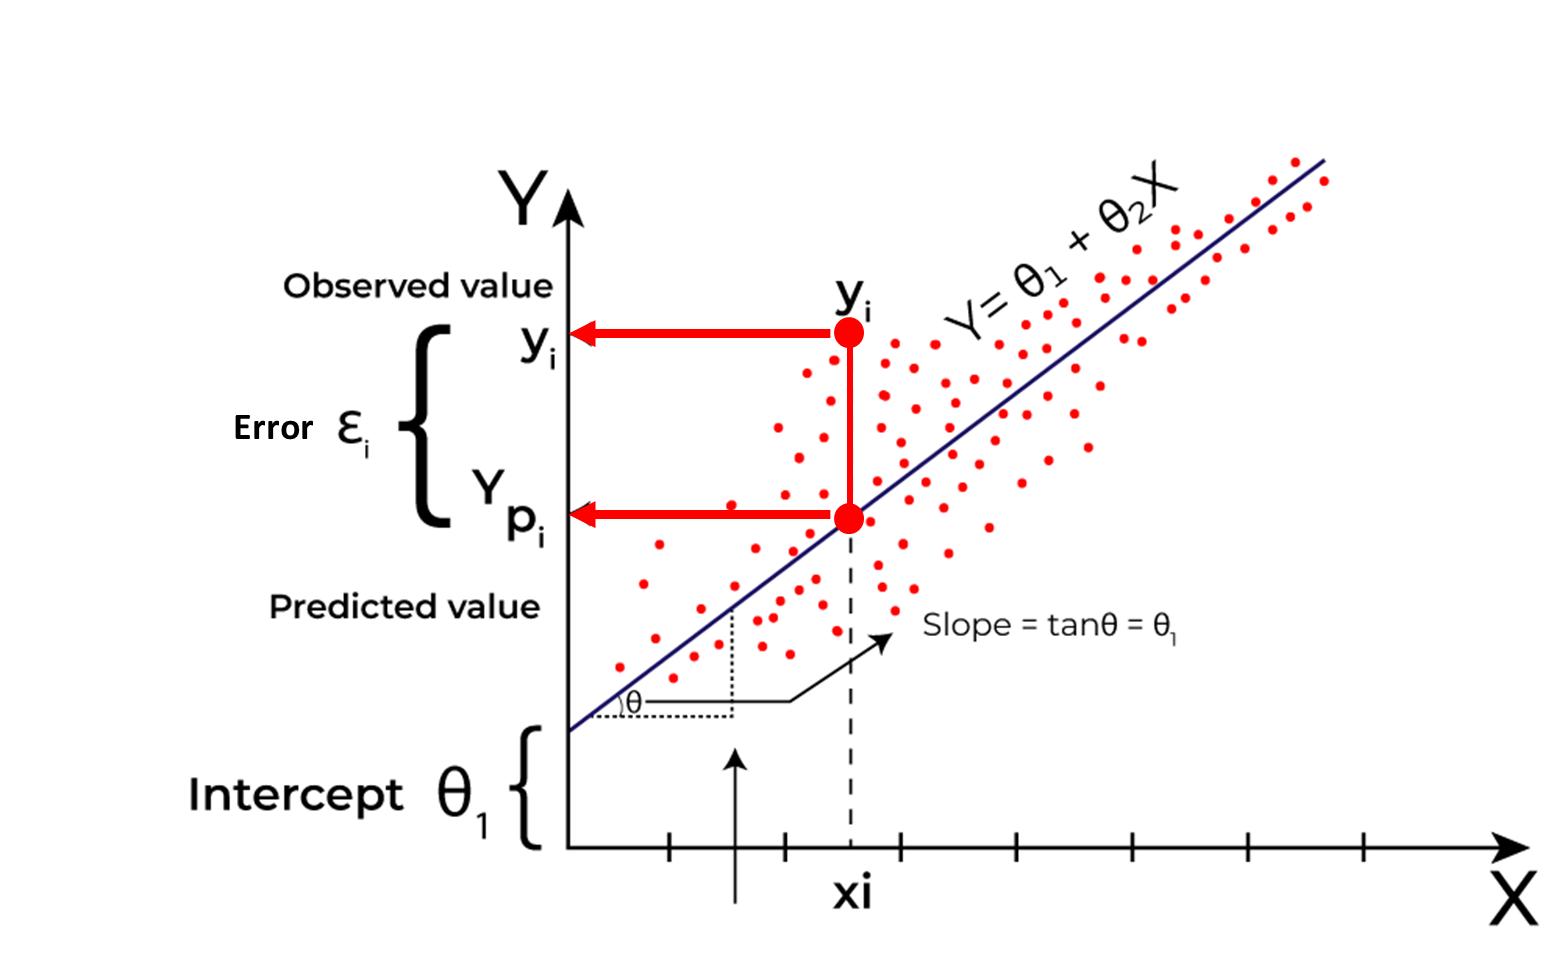

### Different Type of Cost Function

1. $$
MAE = \frac{1}{n} \sum_{j=1}^{n}| y_i - \hat{y_j} |
$$

<br>

2. $$
MSE = \frac{1}{n} \sum_{i=1}^{n}( y_i-\hat{y_i} )^2
$$
  * It's more popular than MAE because the focus tends to large error

<br>

3. $$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}( y_i-\hat{y_i} )^2}
$$
  * **RMSE** is interpretable in the same units as response vector ($y$)
  * **Example:** If you are predicting house prices in dollars, an RMSE of 500 means that, on average, your predictions deviate from the actual prices by $500.

<br>

4. $$
RAE = \frac{\sum_{j=1}^{n}| y_i-\hat{y_i} |}{\sum_{j=1}^{n}| y_i-\bar{y_i} |}
$$

<br>

5. $$
RSE = \frac{\sum_{j=1}^{n}( y_i-\hat{y_i} )^2}{\sum_{j=1}^{n}( y_i-\bar{y_i} )^2}
$$
  * **RSE** is widely adopted by the data science community as it is usd for calculating R-squared.
  * $R^2 = 1 - RSE$
    * $R^2$ represents how close the data values are to fitted regression line.
      * Higher $R^2$ ⇒ the model fits your data well

## Simple Linear Regression with sklearn (Code)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-11-25 02:43:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2024-11-25 02:43:08 (540 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Understanding the Data

`FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Reading the Data

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Split train and test

In [6]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

Modeling

In [7]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

regression.fit(train_x, train_y)

print(f"Coefficients: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficients: [[39.79811337]]
Intercept: [123.65430314]


$$ Co2Emissions = 123.3480325 + Enginesize(39.49689488) $$

**Interpretation**
* For every unit increase in `ENGINESIZE`, `CO2EMISSIONS` increases by approximately 39.50 units.
* When `ENGINESIZE` is 0, the model predicts that `CO2EMISSIONS` would be approximately 123.35 units.

### Plot Outputs

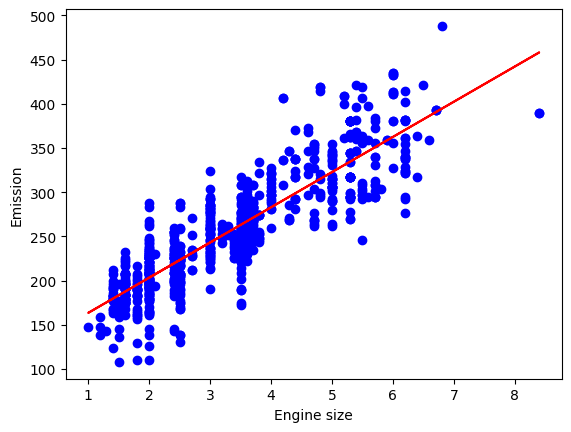

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regression.coef_[0][0]*train_x + regression.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Evaluation

In [11]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

test_y_predict = regression.predict(test_x)

print(f"Mean absolute error: {np.mean(np.absolute(test_y - test_y_predict)) :2f}")
print(f"Residual sum of squares (MSE): {np.mean((test_y - test_y_predict))**2 : 2f}")
print(f"R2-score: {r2_score(test_y, test_y_predict) :2f}")

Mean absolute error: 21.978206
Residual sum of squares (MSE):  9.266549
R2-score: 0.771799


## Multiple Linear Regression

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

### Understanding the Data

`FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-11-26 07:58:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   201KB/s    in 0.4s    

2024-11-26 07:58:26 (201 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Reading the Data

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [16]:
regression = LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regression.fit(x, y)
print(f"Coefficients: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficients: [[10.93203553  7.55472927  9.56177022]]
Intercept: [65.47209837]


$$ Co2Emissions = 65.47209837 + Enginesize(10.93203553) + Cylinders(7.55472927) + Fuelconsumption_comb(9.56177022)$$

**Interpretation:**
* For every unit increase in `Enginesize`, `CO2EMISSIONS` increases by approximately 10.93 units.

* For every unit increase in `Cylinders`, `CO2EMISSIONS` increases by approximately 7.55 units.

* For every unit increase in `Fuelconsumption_comb`, `CO2EMISSIONS` increases by approximately 9.56 units.

* When `ENGINESIZE` is 0, the model predicts that `CO2EMISSIONS` would be approximately 65.47 units.

<br>

**Estimate Relative Importance of Predictors:**
* `Enginesize(10.93)` has higher impact compared to `Cylinders(7.55)` and `Fuelconsumption_comb(9.56)`

As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

### Evaluation

In [15]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

y_hat= regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

print(f"Mean Squared Error (MSE): {np.mean((y_hat-y)**2)}")

# Explained variance score: 1 is perfect prediction
print(f"Variance Score: {regression.score(x, y)}")

Mean Squared Error (MSE): 575.3392105067693
Variance Score: 0.8650716151239469


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{ExplainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.

## Q&A - Multiple Linear Regression

* How to determine whether to use simple or multiple linear regression?
  * **Multiple Linear Regression** may have **better performance** sometimes compared to using a simple linear regression.

<br>

* How many independent variables should you use?
  * Too many **independent variable ($y$)** without any theoretical justification may lead to an **overfit model**.

<br>

* What are the linear relationships between the dependent variable and the independent variables?
  * The relationship between the **dependent variable ($x$)** and **each independent variable ($y$)** should be **linear relationship**.

## Assignment 1

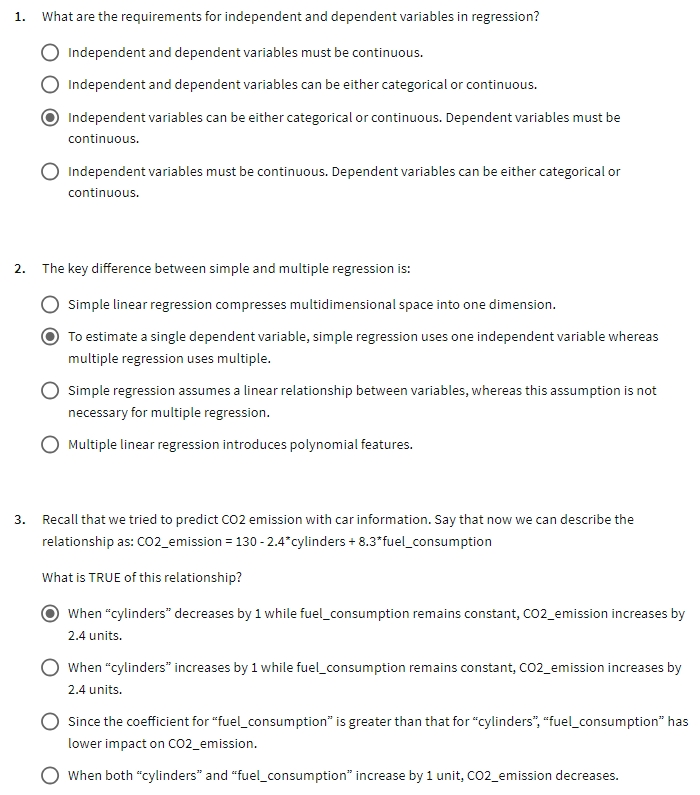

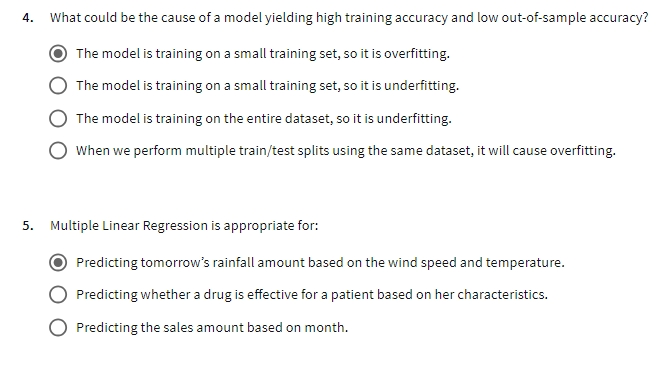

# Classification

**Classification** predicts/determines the class label for an unlabeled test case.

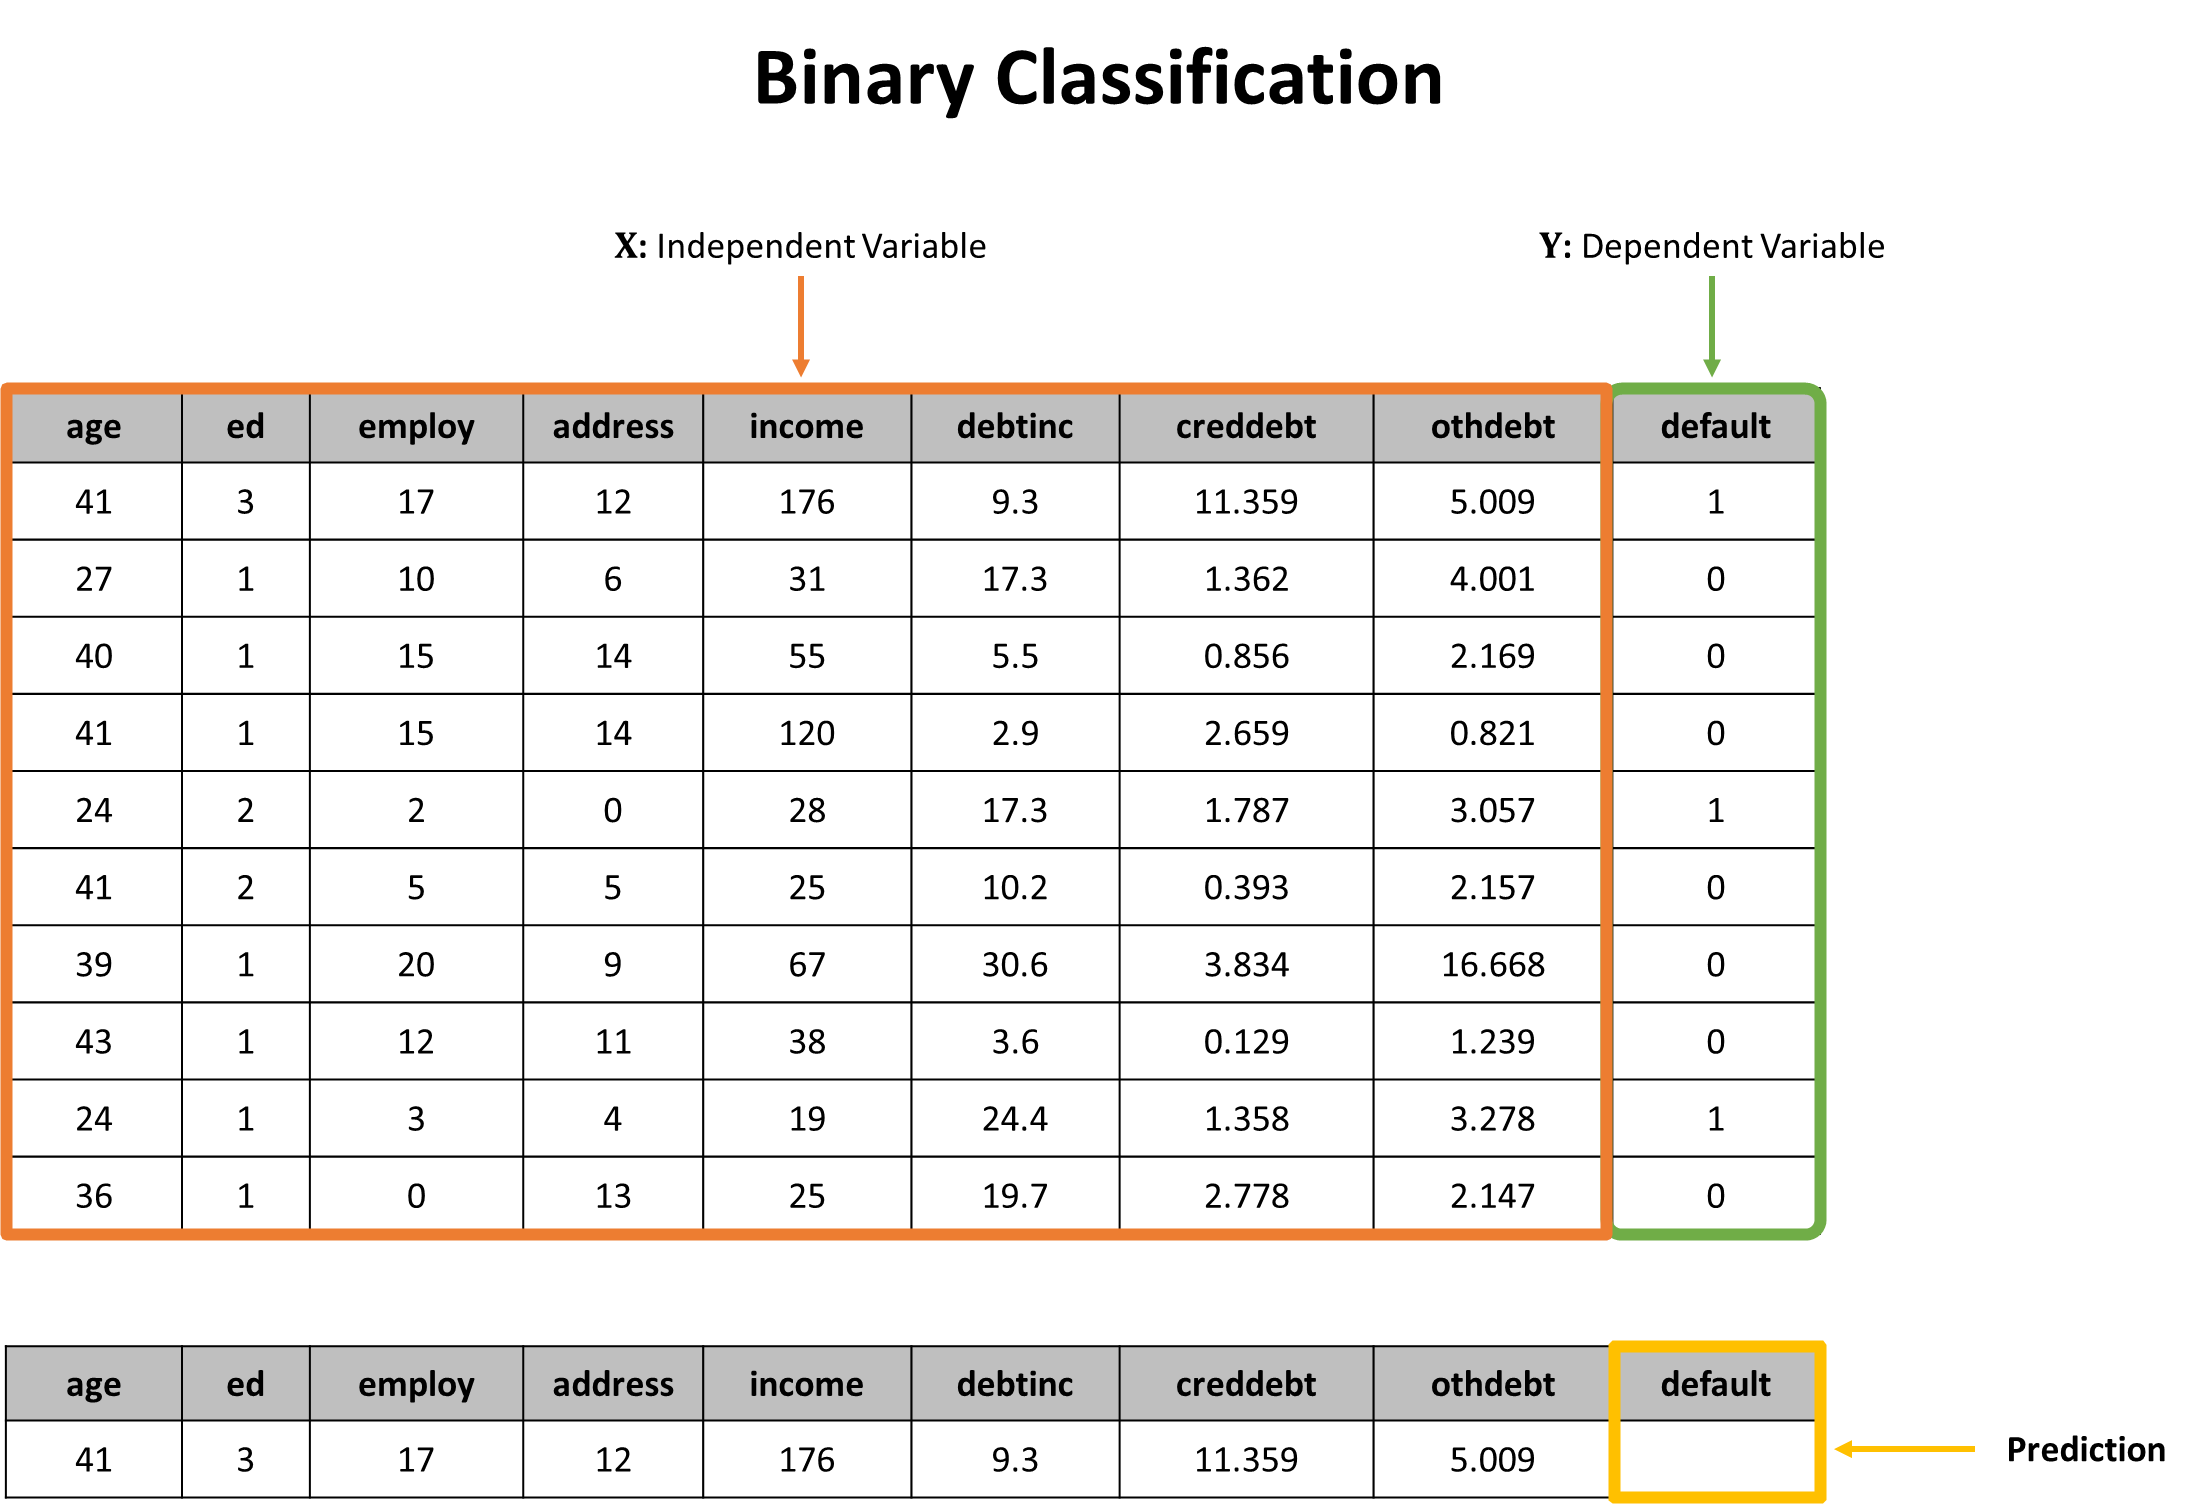

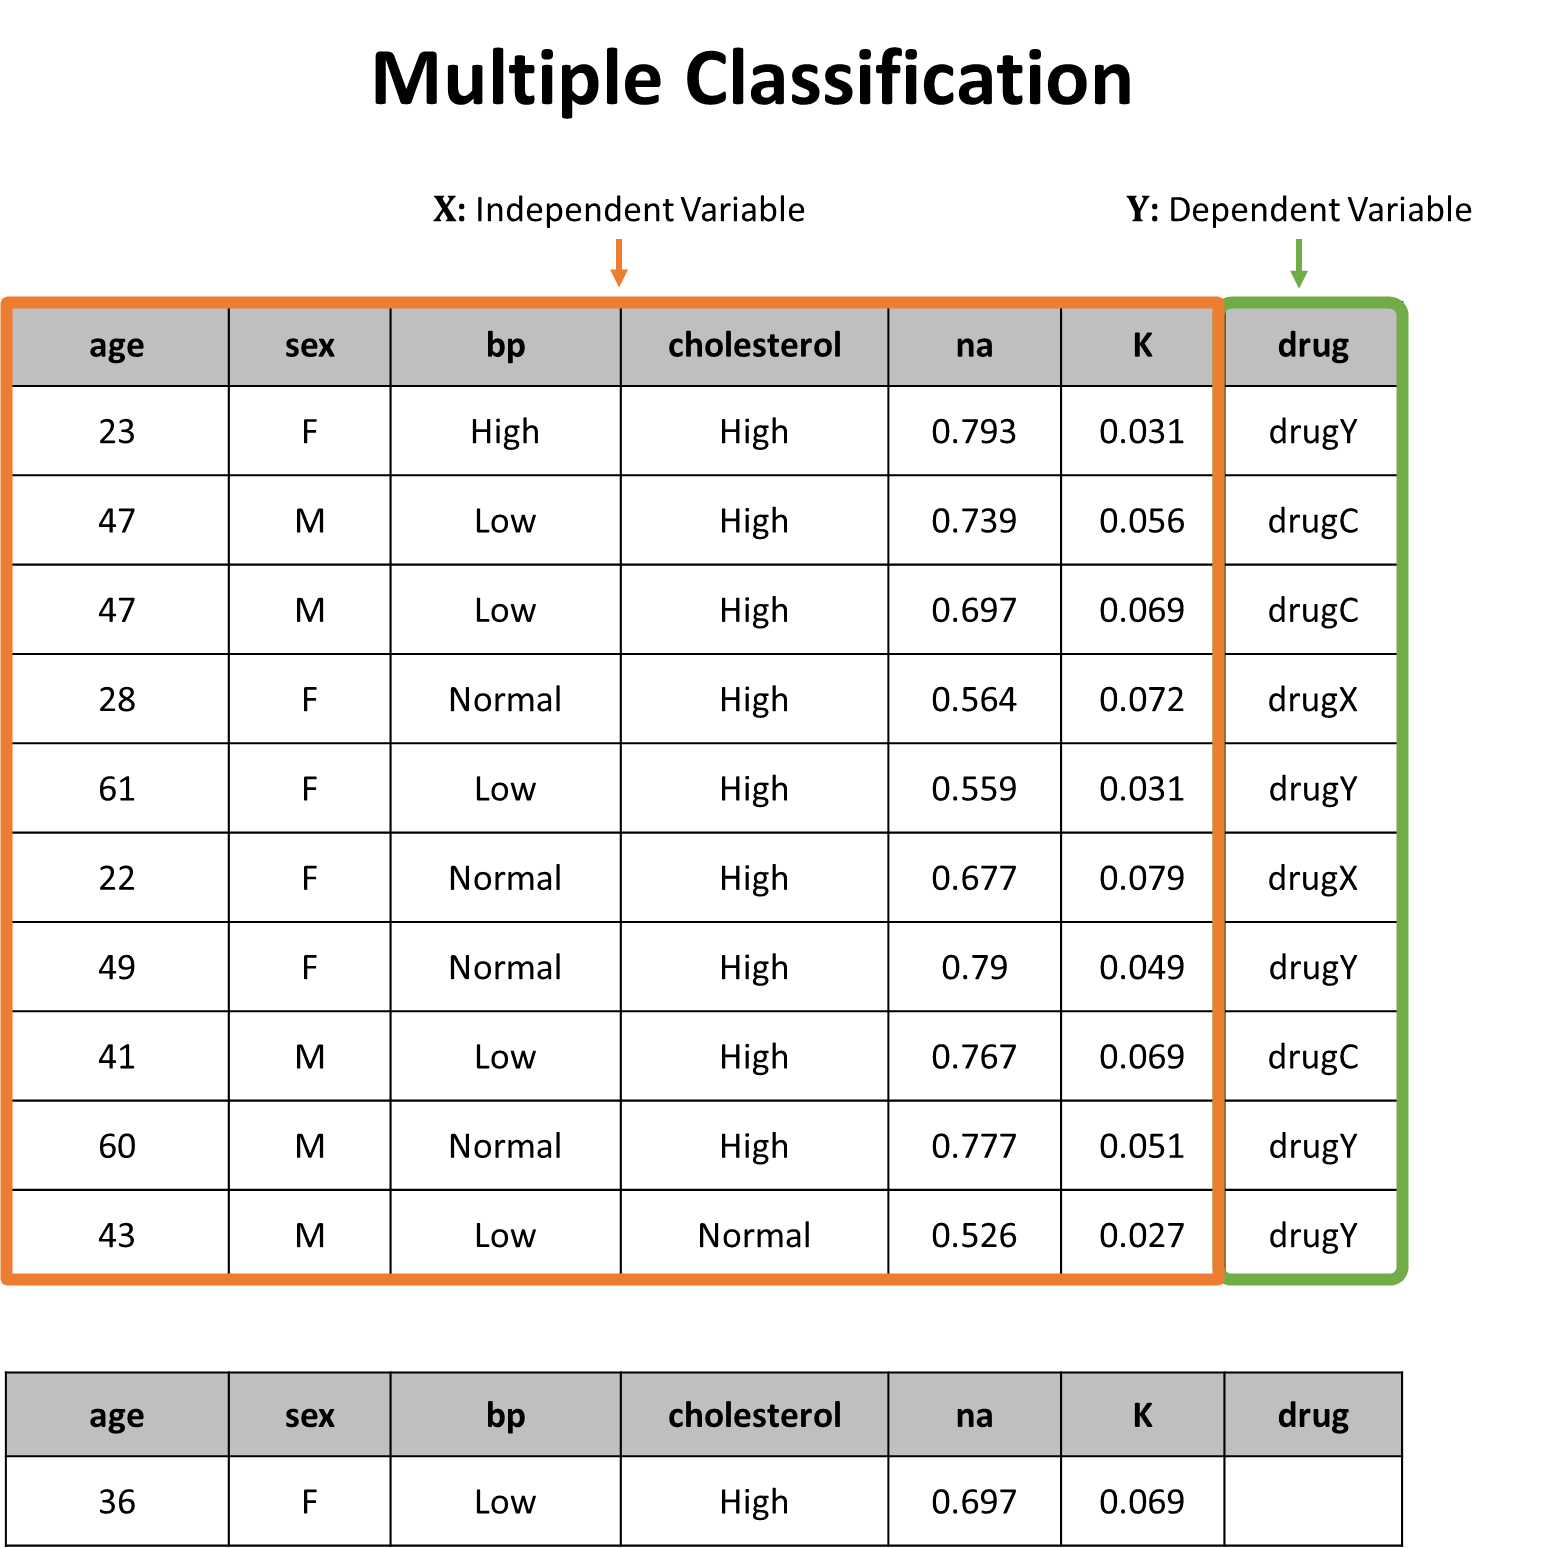

## KNN

**KNN** is a method for classifying cases based on their similarity to other near n-cases (aka "neighbours").
* Similar cases with same class labels are close to each other

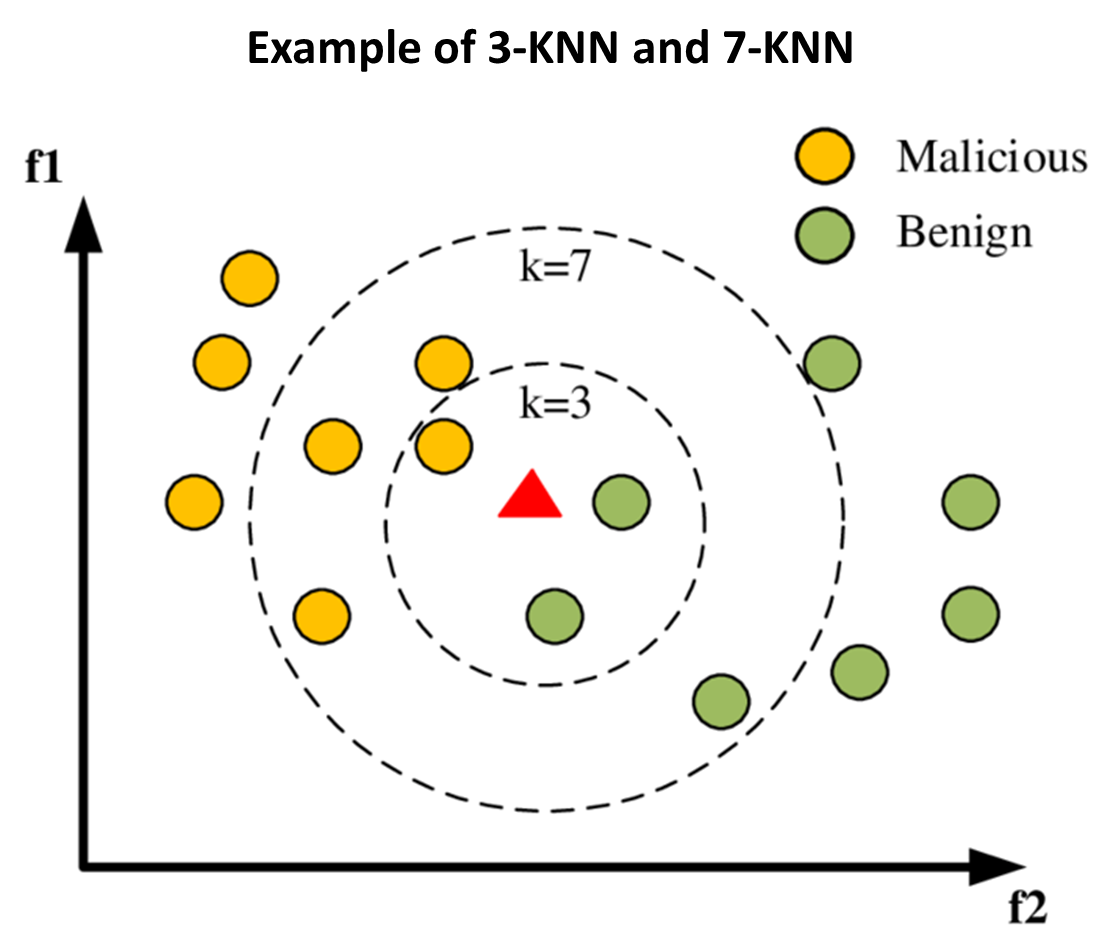

### K-Nearest Neighbors (KNN) Algorithm Calculation Steps:
  1. Pick a value for `K`
  2. Calculate the distance of unknown case from all cases.
  3. Select the K-observations in the training data that are "nearest" to the unknown data point.
  4. Predict the response of the unknown data point using the most popular response value from the K-nearest neighbors.

#### Calculating the similarity / distance in a 1-D space

| Customer 1 | Customer 2 |
| :-------: | :-------: |
| age | age |
| 34  | 30  |

<br><br>

$$
Dis(x_1, x_2) = \sqrt{\sum_{i=0}^{n}(x_{1i} - x_{2i})^2} = \sqrt{(34-30)^2} = 4
$$

#### Calculating the similarity / distance in a 2-D space

<table>
  <tr>
    <td colspan="2">Customer 1</td>
    <td colspan="2">Customer 2</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Income</td>
    <td>Age</td>
    <td>Income</td>
  </tr>
  <tr>
    <td>34</td>
    <td>190</td>
    <td>30</td>
    <td>200</td>
  </tr>
</table>

<br><br>

$$
Dis(x_1, x_2) = \sqrt{\sum_{i=0}^{n}(x_{1i} - x_{2i})^2} = \sqrt{(34-30)^2+(190-200)^2} = 10.77
$$

#### Calculating the similarity / distance in a 3-D space

<table>
  <tr>
    <td colspan="3">Customer 1</td>
    <td colspan="3">Customer 2</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Income</td>
    <td>Education</td>
    <td>Age</td>
    <td>Income</td>
    <td>Education</td>
  </tr>
  <tr>
    <td>34</td>
    <td>190</td>
    <td>3</td>
    <td>30</td>
    <td>200</td>
    <td>3</td>
  </tr>
</table>

<br><br>

$$
Dis(x_1, x_2) = \sqrt{\sum_{i=0}^{n}(x_{1i} - x_{2i})^2} = \sqrt{(34-30)^2+(190-200)^2+(3-8)^2} = 11.87
$$

### Model Evaluation

#### Jaccard Index

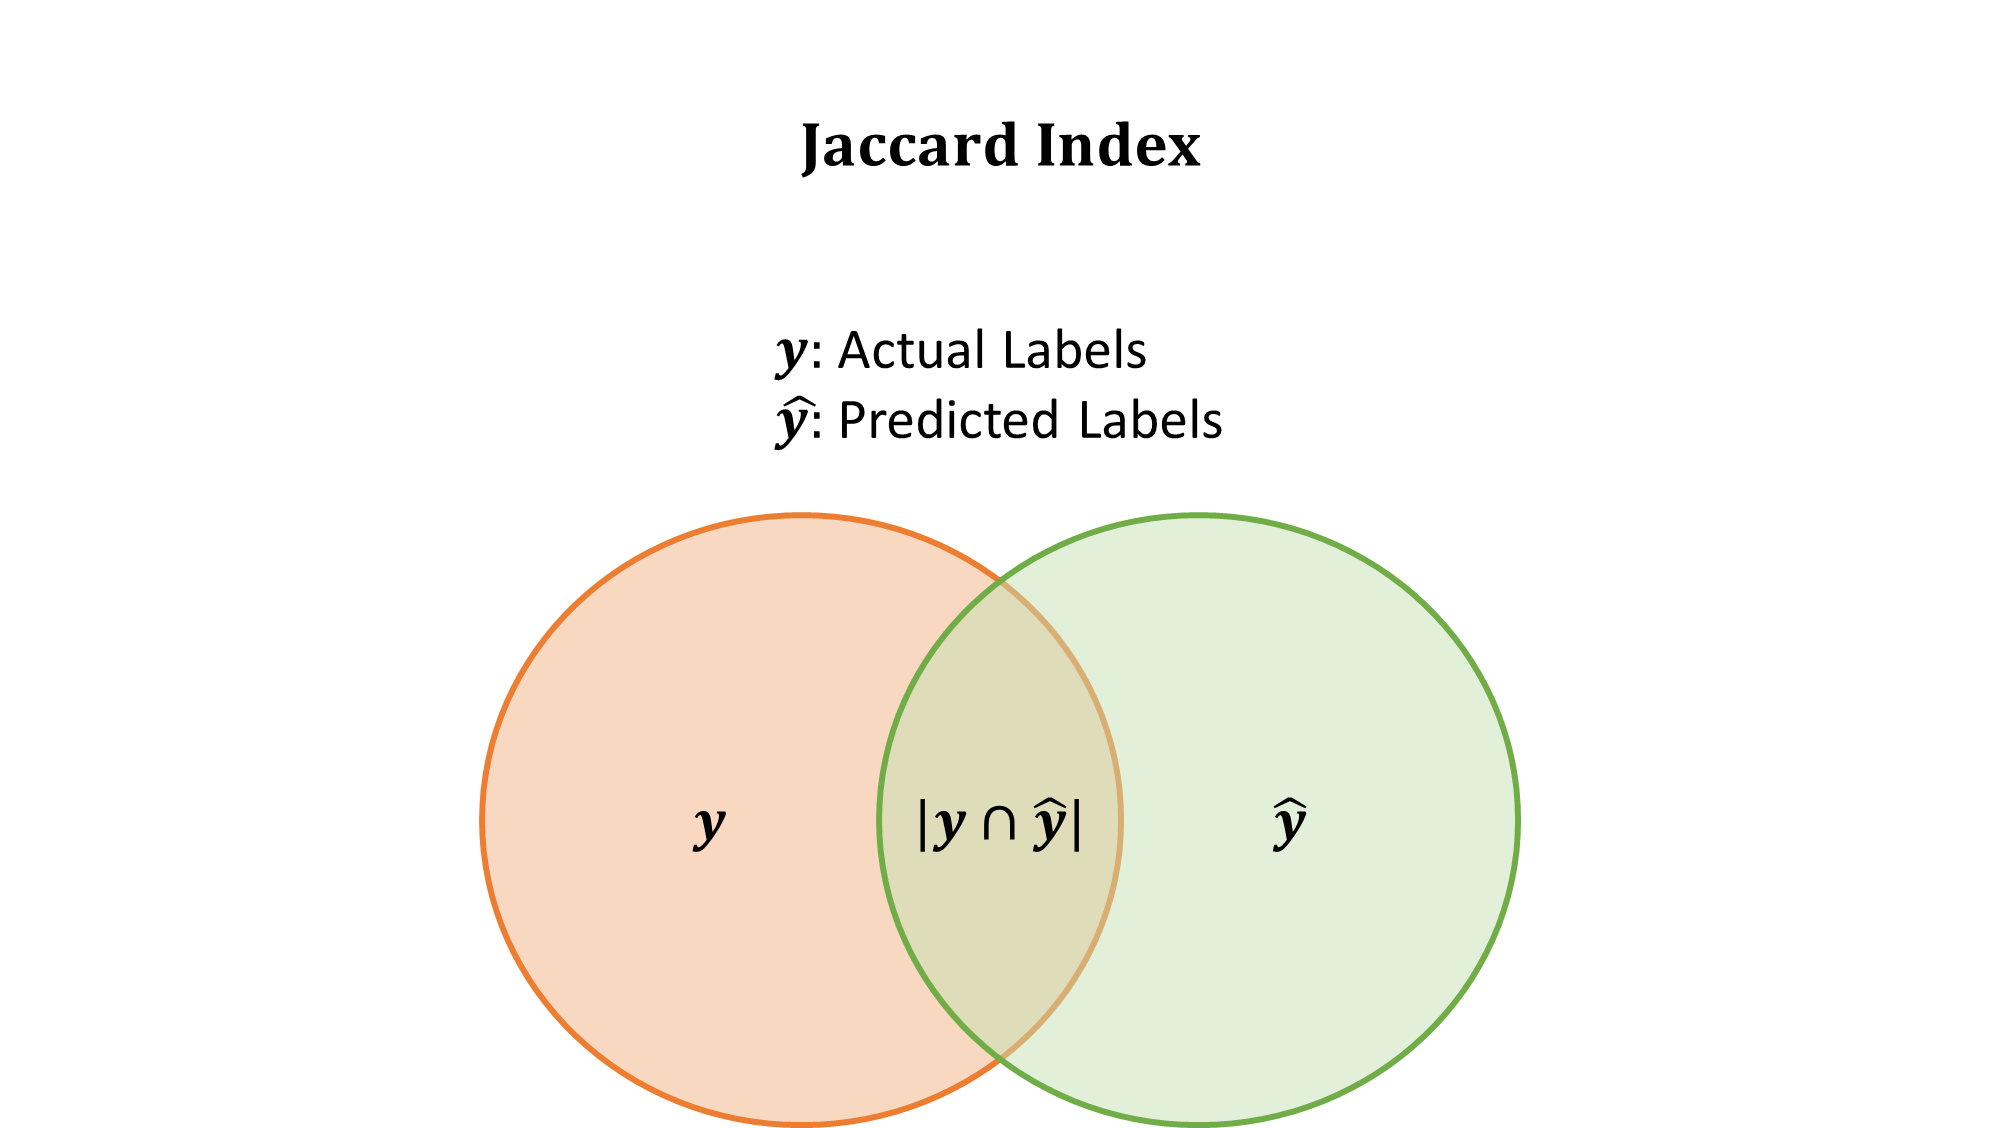

$$
J(y, \hat{y}) = \frac{|y ∩ \hat{y}|}{|y \cup \hat{y}|} = \frac{|y ∩ \hat{y}|}{|y| + |\hat{y}| - |y \cap \hat{y}|}
$$

$y: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]$ (Actual Labels)

$\hat{y}: [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]$ (Predicted Labels)

<br>

Correct prediction: 8

Total Length: 10

$$J(y, \hat{y}) = \frac{|y ∩ \hat{y}|}{|y \cup \hat{y}|} = \frac{8}{10+10-8}=0.66$$


Jaccard Index CLOSE to **1**, **High** accuracy

Jaccard Index CLOSE to **0**, **Low** accuracy

#### F1-Score

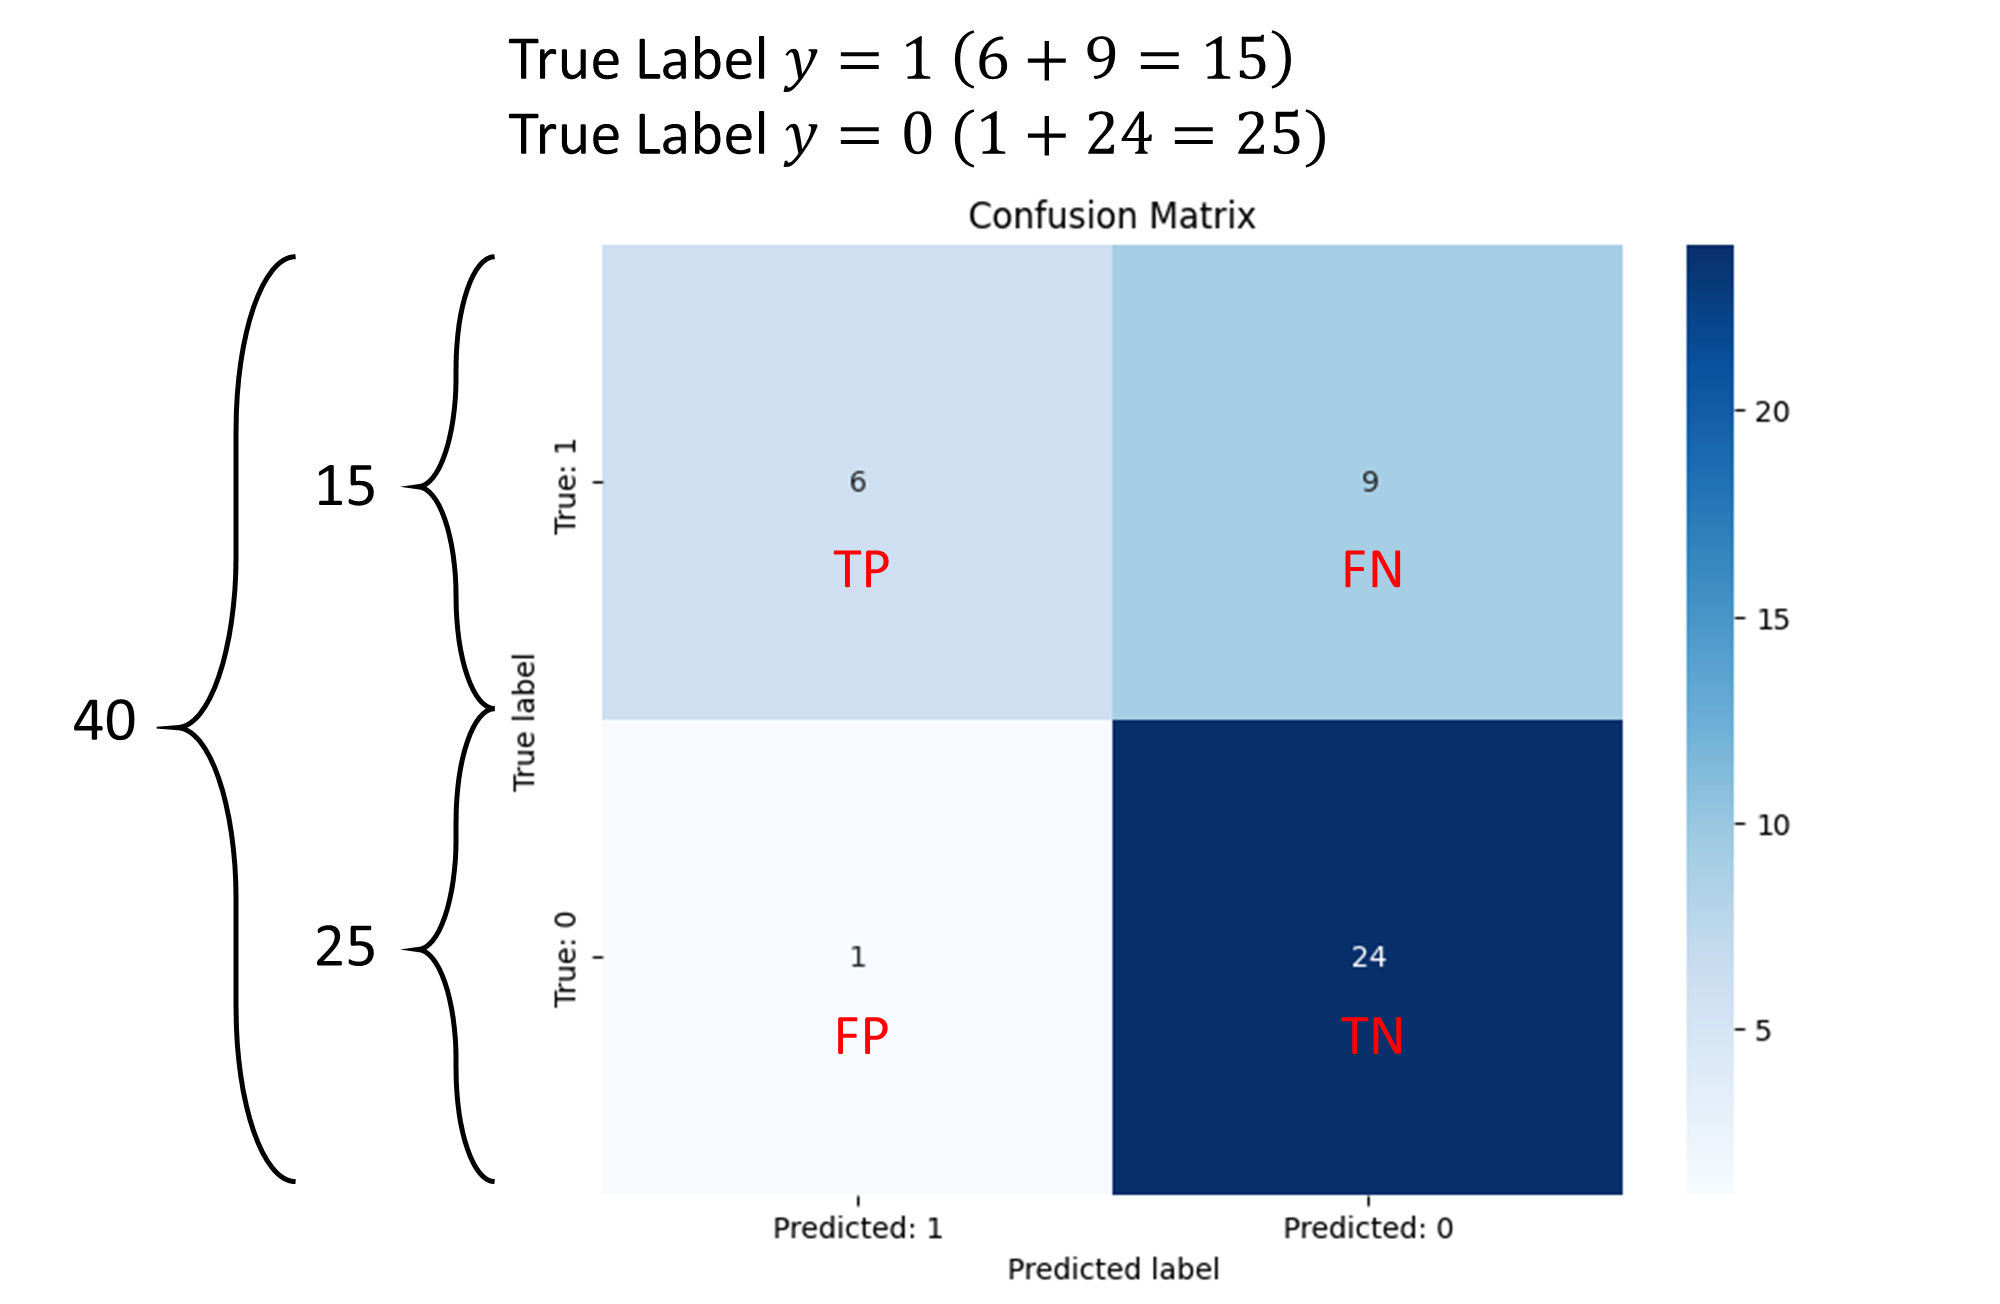

$$\texttt{Precision} = \frac{TP}{\texttt{prediction}=1} = \frac{TP}{TP+FP}$$
<center><b>Precision</b> indicate how many prediction as positive ($\hat{y}=1$) can be accurately predicted as True Positive</center>
<center><b>Precision</b> emphasizes <b>minimizing false positives</b></center>

<br>

$$\texttt{Recall} = \frac{TP}{\texttt{True label} = 1} = \frac{TP}{TP+FN}$$
<center><b>Recall</b> indicate how many actual positive ($y=1$) can be accurately predicted as True Positive</center>
<center><b>Recall</b> emphasizes <b>minimizing false negatives</b></center>

<br>

<center><b>Trade-off:</b><br>A model can accurately prediction positives cases with high precision but may miss many actual positives cases leading to low recall</center>

<br>

$$\texttt{F1-score} = \frac{2 \times precision \times recall}{precision + recall}$$

F1-score CLOSE to **1**, **High** accuracy

F1-score CLOSE to **0**, **Low** accuracy

#### Log Loss / Logistic Loss / Cross-Entropy Loss

<b> Example Dataset </b>

| User ID | Prediction | Probability | Actual |
| :-----: | :--------: | :---------: | :----: |
| user1 | Click | 0.9 | 1 |
| user2 | No Click | 0.2 | 0 |
| user3 | Click | 0.4 | 1 |
| user4 | No Click | 0.6 | 0 |
| user5 | Click | 0.1 | 1 |

<br><br>

<b> LogLoss Formula </b>
$$
\texttt{LogLoss} = -\frac{1}{N}∑(y_{i} \times log(p_{i}) + (1-y_{i}) \times log(1 - p_{i}))
$$

where:
* $N$ is the number of observations
* $y_{i}$ is the actual label (0 or 1)
* $p_{i}$ is the predicted probability

<br><br>

**Calculating LogLoss**
1. For user1
  * $y_{1} = 1$
  * $p_{1} = 0.9$
  * $\texttt{LogLoss} = -(1 \times log(0.9) + (1-1 \times log(1 - 0.9)) = 0.1054$
  * A LogLoss of 0.1054 indicates that the prediction was quite accurate.

2. For user2
  * $y_{2} = 0$
  * $p_{2} = 0.2$
  * $\texttt{LogLoss} = -(1 \times log(0.2) + (1-1 \times log(1 - 0.2)) = 0.2231$

3. For user3
  * $y_{3} = 1$
  * $p_{3} = 0.4$
  * $\texttt{LogLoss} = -(1 \times log(0.4) + (1-1 \times log(1 - 0.4)) = 0.9163$
  * A LogLoss of 0.9163 indicates that the prediction was not accurate, leading to significant penalty.

4. For user4
  * $y_{4} = 0$
  * $p_{4} = 0.6$
  * $\texttt{LogLoss} = -(1 \times log(0.6) + (1-1 \times log(1 - 0.6)) = 0.9163$

5. For user5
  * $y_{5} = 1$
  * $p_{5} = 0.1$
  * $\texttt{LogLoss} = -(1 \times log(0.1) + (1-1 \times log(1 - 0.1)) = 2.3026$
  * A LogLoss of 2.3026 indicates that the prediction was not accurate and made poor estimation, leading to significant penalty.

### K-Nearest Neighbours Code

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

<br>

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

<br>

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

<br>

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [1]:
%reset -f

In [9]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

#### Data Visualization and Analysis

In [4]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


* 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


array([[<Axes: title={'center': 'income'}>]], dtype=object)

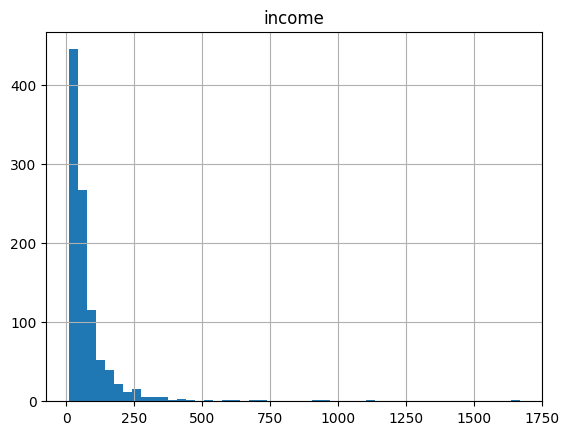

In [5]:
df.hist(column='income', bins=50)

#### Dataset

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values

y = df['custcat'].values

#### Normalize Data

Standardization is a data preprocessing method that transform features to have a mean of 0 and standard deviation of 1. This transformation ensures that all features contribute equally to the distance calculations used in various algorithms.

<br><br>

$$
standardized = \frac{x_{i} - \mu}{\sigma}
$$

where:
* $x_{i}:$ input value
* $\mu:$ mean
* $\sigma:$ standard deviation

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))